# Exercises
Do you work for this exercise in either a jupyter notebook named `evaluate` within your `regression-exercises` repository. By the end of this exercise you will also create a python script named `evaluate.py`, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your `regression-exercises` repo.

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from statsmodels.formula.api import ols

import evaluate

#from math import sqrt
#from sklearn.metrics import mean_squared_error

# 1. Load the `tips` dataset from either `pydataset` or `seaborn`.

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


Text(0, 0.5, 'Tip Amt ($)')

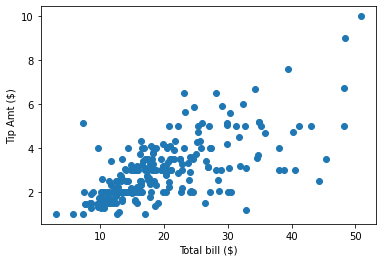

In [5]:
# scatterplot of total_bill v. tip
plt.scatter(tips.total_bill, tips.tip)

plt.xlabel('Total bill ($)')
plt.ylabel('Tip Amt ($)')

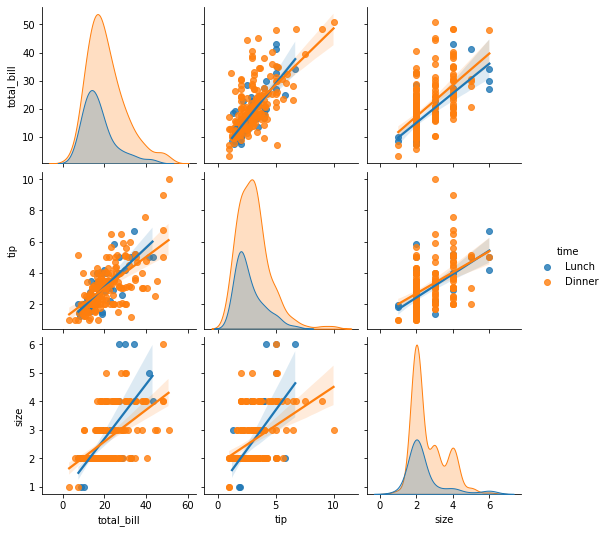

In [7]:
sns.pairplot(tips, kind='reg', hue='time')

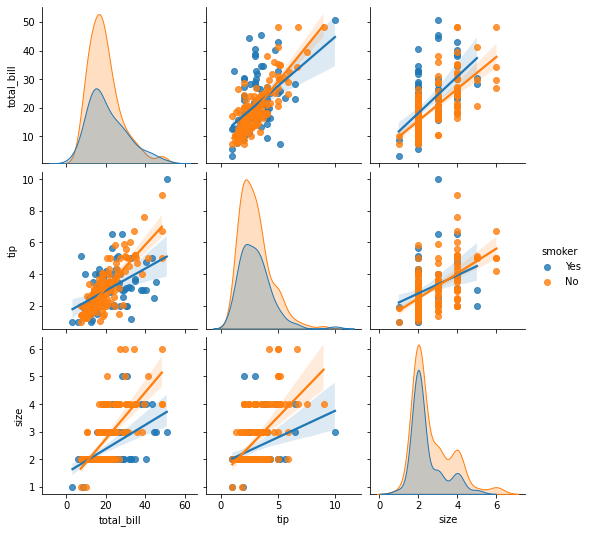

In [8]:
sns.pairplot(tips, kind='reg', hue='smoker')

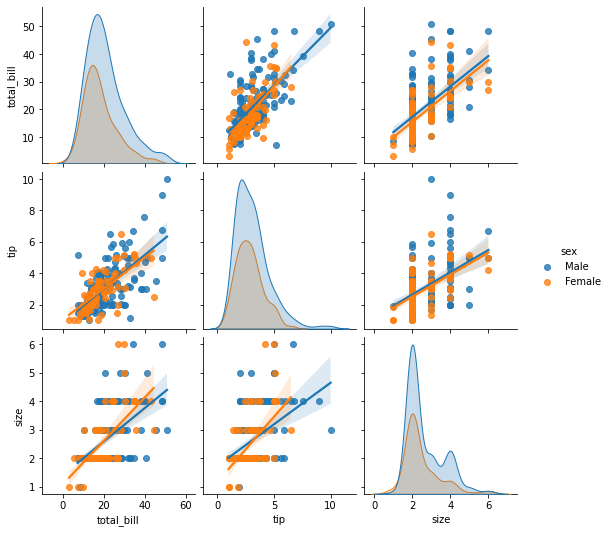

In [9]:
sns.pairplot(tips, kind='reg', hue='sex')

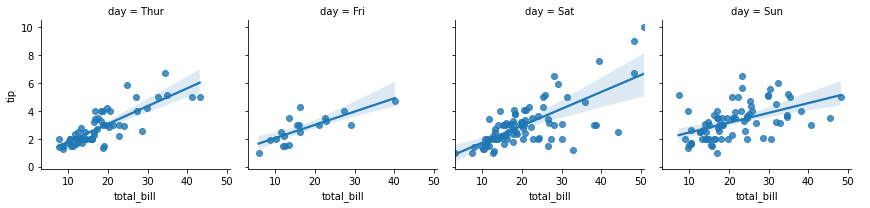

In [15]:
g = sns.FacetGrid(tips, col="day")
g.map(sns.regplot, "total_bill", "tip")
g.add_legend()

# 2. Fit a linear regression model (ordinary least squares) and compute `yhat`, predictions of tip using `total_bill`.

Here is some sample code to get you started:

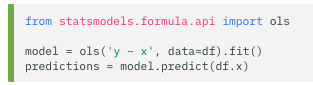

The code above fits a linear regression model on the `df` dataset, using column `y` as the target and column `x` as the predictor. Modify the code as necessary to work with the `tips` dataset.

In [16]:
#target baseline
tips.tip.mean()

2.9982786885245902

In [4]:
tips['baseline'] = tips.tip.mean()
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size,baseline
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279


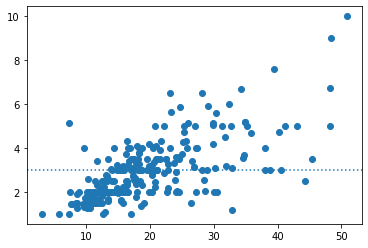

In [18]:
# plot data with baseline

plt.scatter(tips.total_bill, tips.tip)
plt.axhline(tips.tip.mean(), ls = ':') #ls=line style

In [5]:
#OLS

#create/fit the model
ols_model = ols('tip ~ total_bill', data=tips).fit()
# compute predictions and attach to DF
tips['yhat'] = ols_model.predict(tips.total_bill)

tips.head(3)

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835


Text(0.5, 1.0, 'Baseline and OLS regression model')

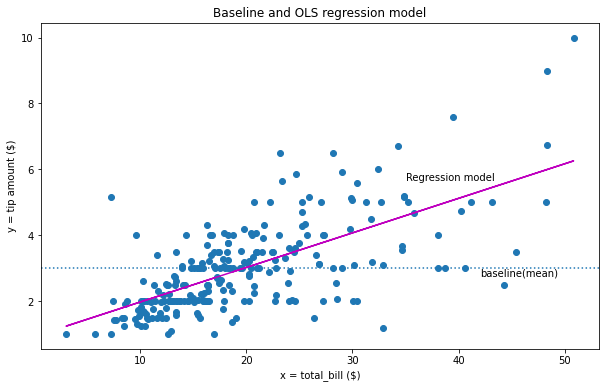

In [40]:
#visualize the data

fig = plt.figure(figsize = (10,6))
plt.scatter(tips.total_bill, tips.tip)
plt.axhline(y = tips.tip.mean(), ls = ':')
plt.plot(tips.total_bill, tips.yhat, color='m')
plt.text(42,2.75, 'baseline(mean)')
plt.text(35,5.65, 'Regression model')
plt.xlabel('x = total_bill ($)')
plt.ylabel('y = tip amount ($)')
plt.title('Baseline and OLS regression model')

# 3. Plot the residuals for the linear regression model that you made.

In [35]:
tips['residual'] = tips.tip - tips.yhat
tips['baseline_residual'] = tips.tip - tips.baseline

In [41]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,baseline_residual
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721


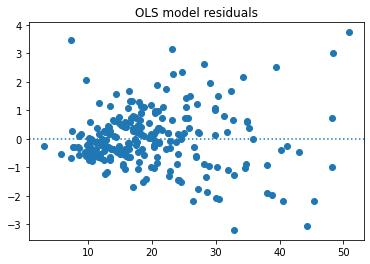

In [37]:
plt.scatter(tips.total_bill, tips.residual)
plt.axhline(y = 0, ls = ':')
plt.title('OLS model residuals');

#should only be left with random noise: ϵ
#after removing linear trend

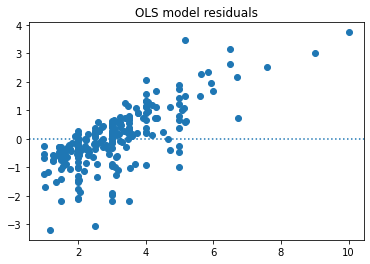

In [42]:
plt.scatter(tips.tip, tips.residual)
plt.axhline(y = 0, ls = ':')
plt.title('OLS model residuals');

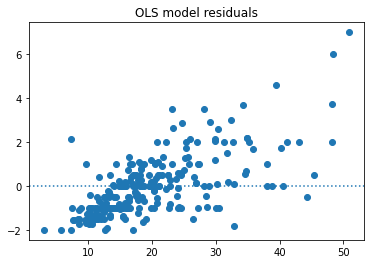

In [43]:
plt.scatter(tips.total_bill, tips.baseline_residual)
plt.axhline(y = 0, ls = ':')
plt.title('OLS model residuals');

# 4. Calculate the:
- mean squared error (MSE)
- sum of squared errors (SSE)
- root mean squared error (RMSE)
- total sum of squares (TSS)
    - TSS = SSE_baseline
    - TSS = SSE + ESS
- explained sum of squares (R<sup>2</sup>)
    - $R^2$ = ESS/TSS
    - $R^2$ = 1 - SSE/TSS  (since ESS + SSE = TSS) 
 
 for your model.

In [6]:
# Mean Squared Error (MSE) via sklearn
MSE = mean_squared_error(tips.tip, tips.yhat)
MSE_baseline = mean_squared_error(tips.tip, tips.baseline)

print(f"MSE: {MSE}") 
print(f"MSE baseline: {MSE_baseline}") 

MSE: 1.036019442011377
MSE baseline: 1.906608512496641


In [7]:
# Sum of Squared Errors (SSE)
SSE = MSE * len(tips)
SSE_baseline = MSE_baseline * len(tips)

print(f"SSE: {SSE}") 
print(f"SSE baseline: {SSE_baseline}") 

SSE: 252.788743850776
SSE baseline: 465.2124770491804


In [8]:
# Root Mean Squared Errors (RMSE)
RMSE = sqrt(MSE)
RMSE_baseline = sqrt(MSE_baseline)

print(f"RMSE: {RMSE}") 
print(f"RMSE baseline: {RMSE_baseline}") 

RMSE: 1.0178504025697377
RMSE baseline: 1.3807999538298954


In [9]:
# Total sum of Squares (TSS)
TSS = SSE_baseline
print(f"TSS: {TSS} :SSE_baseline") 

TSS: 465.2124770491804 :SSE_baseline


In [10]:
# Explained Sum of Squares (ESS) AKA: 'Explained Error'
ESS = TSS - SSE

print(f"ESS: {ESS}") 

ESS: 212.4237331984044


In [11]:
# R^2
R2 = 1 - (SSE/TSS)

print(f"R2: {R2}") 

R2: 0.45661658635167646


In [12]:
# R^2
R2_alt = ESS/TSS

print(f"R2: {R2_alt}") 

R2: 0.45661658635167646


# 5. Calculate the 
- sum of squared errors (SSE_baseline) 
- mean squared error (MSE_baseline)
- root mean squared error (RMSE_baseline)

for the **baseline model** (i.e. a model that always predicts the average tip amount).

In [40]:
print(f"RMSE baseline: {SSE_baseline}") 
print(f"RMSE baseline: {MSE_baseline}") 
print(f"RMSE baseline: {RMSE_baseline}") 

RMSE baseline: 465.2124770491804
RMSE baseline: 1.906608512496641
RMSE baseline: 1.3807999538298954


# 6. Write python code that:
- compares the sum of squared errors for your model **(SSE)** against the sum of squared errors for the baseline model **(SSE_baseline)** and 
- outputs whether or not your model performs better than the baseline model.

In [16]:
if (SSE < SSE_baseline):
    print(f"Linear Regression Model's SSE {round(SSE, 3)} performs better than the Baseline SSE {round(SSE_baseline, 3)}.")
        
else:
    print(f"The Baseline SSE {round(SSE_baseline, 3)} performs better than the Linear Regression Model's SSE {round(SSE, 3)}.")
    

Linear Regression Model's SSE 252.789 performs better than the Baseline SSE 465.212.


# 7. What is the amount of variance explained in your model?

In [13]:
print(f"R2: {R2}")

R2: 0.45661658635167646


In [45]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           6.69e-34
Time:                        16:45:00   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
f"R^2: {ols_model.rsquared}"

'R^2: 0.45661658635167646'

In [ ]:
f"R^2: {ols_model.rsquared}"

In [48]:
f"Parameters: {ols_model.params}"

'Parameters: Intercept     0.920270\ntotal_bill    0.105025\ndtype: float64'

# 8. Is your model significantly better than the baseline model?

In [20]:
null_hypothesis = "β1 = β2: The baseline and linear regression models are the same."
alt_hypothesis = "β1 != β2: The baseline and linear regression models are NOT the same."

In [21]:
α = 0.05

In [24]:
from sklearn.feature_selection import f_regression

f_regression(tips.total_bill, tips.tip)

NameError: name 'feature_selection' is not defined

In [25]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           6.69e-34
Time:                        15:04:50   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

___
Prob (F-statistic): 6.69e-34

α = 0.05

f-statistic < α

### Therefore: Reject null_hypothesis.
___

# 9. Create a file named `evaluate.py` that contains the following functions.
- `plot_residuals(y, yhat)`: creates a residual plot
- `regression_errors(y, yhat)`: returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- `baseline_mean_errors(y)`: computes the SSE, MSE, and RMSE for the baseline model
- `better_than_baseline(y, yhat)`: returns true if your model performs better than the baseline, otherwise false
- `model_significance(ols_model)`: that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether your model is significantly better than the baseline model (Hint: use the `rsquared` and `f_pvalue` properties from the ols model)

In [17]:
def sse_vs_baseline(df, y, x):
    '''
    
    '''
    df['baseline'] = df[y].mean()
    
    ols_model = ols('y ~ x', data=df).fit()
    df['yhat'] = ols_model.predict(df[x])
    
    MSE = mean_squared_error(df[y], df.yhat)
    MSE_baseline = mean_squared_error(df[y], df.baseline)
    
    SSE = MSE * len(df)
    SSE_baseline = MSE_baseline * len(df)
    
    if (SSE < SSE_baseline):
        print(f"Linear Regression Model's SSE {round(SSE, 3)} performs better than the Baseline SSE {round(SSE_baseline, 3)}.")
        
    else:
        print(f"The Baseline SSE {round(SSE_baseline, 3)} performs better than the Linear Regression Model's SSE {round(SSE, 3)}.")
        
    
    

In [18]:
sse_vs_baseline(tips, tip, total_bill)

NameError: name 'tip' is not defined

In [ ]:
def base():
    '''
    
    '''
    
    x = df['{var}']
    y = df['{target}']

In [32]:
def plot_residuals(target, yhat):
    '''
    plot_residuals will take in a target series and prediction series
    and plot the residuals as a scatterplot.
    '''
    
    residual = target - yhat
    
    plt.scatter(target, residual)
    plt.axhline(y = 0, ls = ':')
    plt.xlabel("target")
    plt.ylabel("residual")
    plt.title('Residual Plot')
    plt.show


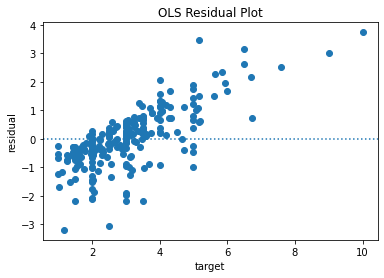

In [33]:
plot_residuals(tips.tip, tips.yhat)

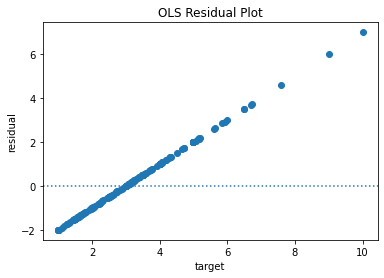

In [38]:
plot_residuals(tips.tip, tips.baseline)

In [74]:
def regression_errors(target, yhat):
    '''
    regression_errors takes in a target and prediction series
    and prints out the regression error metrics.
    '''
    residual = target - yhat
    
    MSE = mean_squared_error(target, yhat)
    SSE = (residual **2).sum()
    RMSE = sqrt(MSE)
    TSS = ((target - yhat.mean()) ** 2).sum()
    ESS = ((yhat - target.mean()) ** 2).sum()
    print(f"""
    MSE: {round(MSE,2)}
    SSE: {round(SSE,2)}
    RMSE: {round(RMSE,2)}
    TSS: {round(TSS,2)}
    ESS: {round(ESS,2)}
    """)
    

In [75]:
regression_errors(tips.tip, tips.yhat)


    MSE: 1.04
    SSE: 252.79
    RMSE: 1.02
    TSS: 465.21
    ESS: 212.42
    


In [82]:
def baseline_mean_errors(target):
    '''
    baseline_mean_errors takes in a target 
    and prints out the regression error metrics for the baseline.
    '''
    baseline = {target}.mean()
    
    residual = target - baseline
    
    MSE_baseline = mean_squared_error(target, baseline)
    SSE_baseline = (residual **2).sum()
    RMSE_baseline = sqrt(MSE_baseline)
    
    print(f"""
    MSE_baseline: {round(MSE_baseline,2)}
    SSE_baseline: {round(SSE_baseline,2)}
    RMSE_baseline: {round(RMSE_baseline,2)}
    """)

In [83]:
baseline_mean_errors(tips.tip)

TypeError: 'Series' objects are mutable, thus they cannot be hashed

# 10. Load the `mpg` dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your `evaluate.py` to help accomplish this.

In [54]:
mpg = sns.load_dataset('mpg')

In [55]:
mpg.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
